In [1]:
# Sys.setenv(OMP_NUM_THREADS = 4)
library(Seurat)
library(tidyverse)
library(ggplot2)
library(ggpubr)

Loading required package: SeuratObject

Loading required package: sp

'SeuratObject' was built with package 'Matrix' 1.6.3 but the current
version is 1.6.4; it is recomended that you reinstall 'SeuratObject' as
the ABI for 'Matrix' may have changed


Attaching package: 'SeuratObject'


The following object is masked from 'package:base':

    intersect


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.4.4     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.0
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"package 'ggpubr' was built under R version 4.3.1"


In [2]:
esc.AS <- readRDS("/share/Data/hxie/project/202209/esc_xwliu/esc1014_halfday/RNA_analysis/RDS/esc_AS_remove_neg_904.rds")

In [3]:
metadata <- read_csv("/share/Data/hxie/project/202209/esc_xwliu/esc1014_halfday/RNA_analysis/s1014_metadata_X_noM_noXistneg.csv")

New names:
* `` -> `...1`
Rows: 904 Columns: 18
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (7): ...1, orig.ident, sample2, sample3, cellcycle_threshold, day, cell...
dbl (11): nCount_RNA, nFeature_RNA, nCount_SCT, nFeature_SCT, SCT_snn_res.1....

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
embedding <- read_csv("/share/Data/hxie/project/202209/esc_xwliu/esc1014_halfday/HiC_analysis/higashi/embedding_dim2.csv") %>% select(-"...1")
names(embedding) <- c("fasthigashi1","fasthigashi2")

New names:
* `` -> `...1`
Rows: 904 Columns: 3
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (3): ...1, 0, 1

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
embedding["cellname"] <- metadata["cellname"]
embedding <- embedding %>% column_to_rownames("cellname")

In [6]:
embedding <- as.matrix(embedding)

In [7]:
emb <- CreateDimReducObject(embeddings = embedding, key = "fasthigashi_", assay = "RNA")

In [8]:
esc.AS[["fasthigashi"]] <- emb

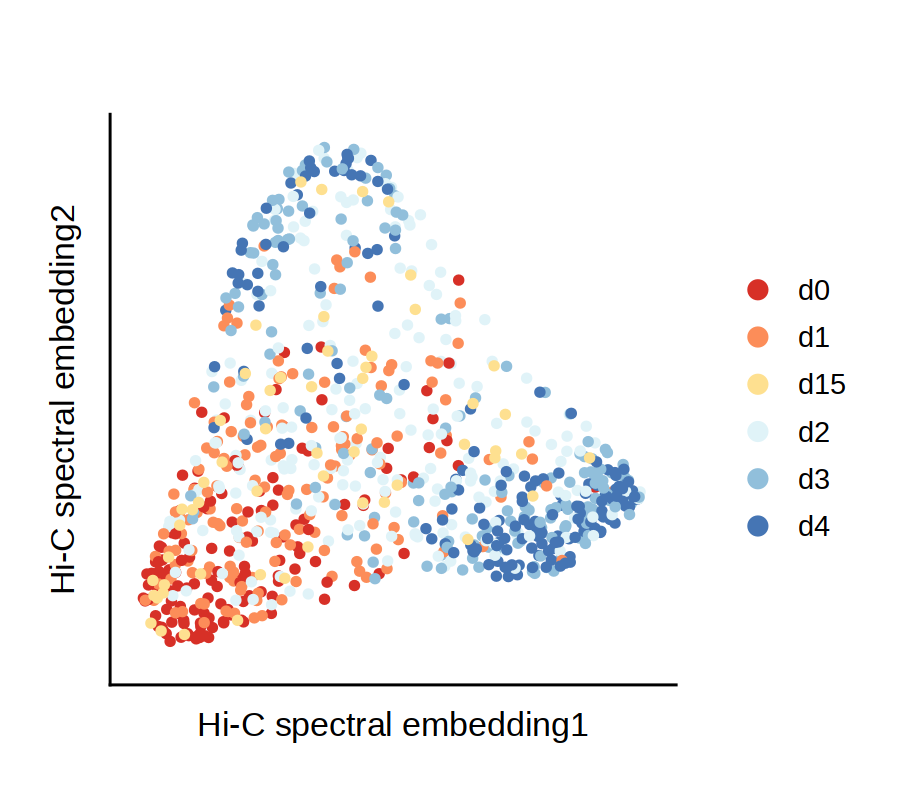

In [9]:
options(repr.plot.width = 3,repr.plot.height = 2.65, repr.plot.res = 300)
colors = c('#d73027','#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4')
p <- DimPlot(esc.AS, reduction = "fasthigashi", group.by = 'day', label = F, pt.size = 0.4, label.size = 5,repel = T,cols=alpha(colors,1)) + ggtitle("") +
    xlim(-0.01,0.012) + ylim(-0.01,0.016)+
    theme(axis.text.x = element_blank(), 
        axis.text.y = element_blank(),
        axis.ticks = element_blank(),
        axis.title.y = element_text(angle=90),
        axis.title.x = element_text(),
        text = element_text(family="Arial", size=8),
        axis.line = element_line(colour="black", linewidth = 0.25),
        legend.key = element_rect(colour = NA),
#        legend.position = "top",
#        legend.direction = "horizontal",
        legend.key.size= unit(0.4, "cm"),
        legend.key.width = unit(0.4, "cm"),
#        legend.margin = unit(0, "cm"),
        ) + guides(color = guide_legend(override.aes = list(size = 1.5))) +
    xlab("Hi-C spectral embedding1") + ylab("Hi-C spectral embedding2")
p 
ggsave("/share/Data/hxie/project/202209/esc_xwliu/esc0312_tidyup/fig1/figures/fig1E_1.svg", width = 3, height = 2.65, units = "in", dpi = 300)

In [10]:
esc.AS@meta.data <- esc.AS@meta.data %>% mutate(umap_plot_cluster = paste0("c",plot_cluster))

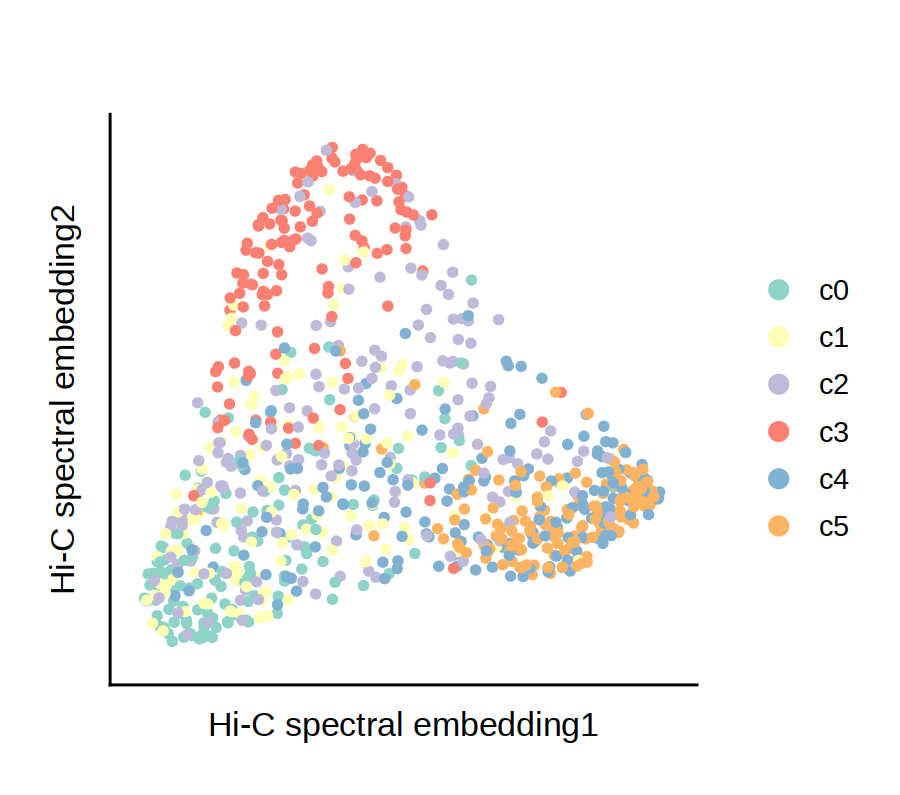

In [11]:
options(repr.plot.width = 3,repr.plot.height = 2.65, repr.plot.res = 300)
colors = c('#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462')
p <- DimPlot(esc.AS, reduction = "fasthigashi", group.by = 'umap_plot_cluster', label = F, pt.size = 0.4, label.size = 5,repel = T,cols=alpha(colors,1)) + ggtitle("") +
    xlim(-0.01,0.012) + ylim(-0.01,0.016)+
    theme(axis.text.x = element_blank(), 
        axis.text.y = element_blank(),
        axis.ticks = element_blank(),
        axis.title.y = element_text(angle=90),
        axis.title.x = element_text(),
        text = element_text(family="Arial", size=8),
        axis.line = element_line(colour="black", linewidth = 0.25),
        legend.key = element_rect(colour = NA),
#        legend.position = "top",
#        legend.direction = "horizontal",
        legend.key.size= unit(0.4, "cm"),
        legend.key.width = unit(0.4, "cm"),
#        legend.margin = unit(0, "cm"),
        ) + guides(color = guide_legend(override.aes = list(size = 1.5))) +
    xlab("Hi-C spectral embedding1") + ylab("Hi-C spectral embedding2")
p 
ggsave("/share/Data/hxie/project/202209/esc_xwliu/esc0312_tidyup/fig1/figures/fig1E_2.svg", width = 3, height = 2.65, units = "in", dpi = 300)

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


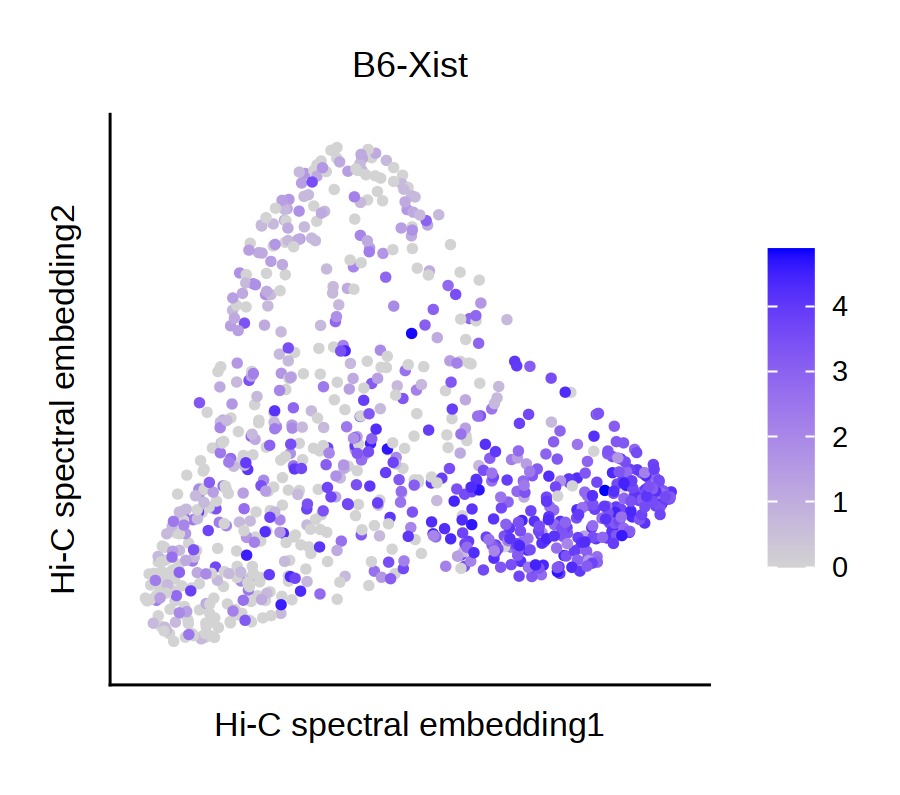

In [12]:
p <- FeaturePlot(esc.AS, features = "B6-Xist", reduction = "fasthigashi",pt.size = 0.4) + 
    xlim(-0.01,0.012) + ylim(-0.01,0.016)+
    theme(axis.text.x = element_blank(), 
        axis.text.y = element_blank(),
        axis.ticks = element_blank(),
        axis.title.y = element_text(angle=90),
        axis.title.x = element_text(),
        text = element_text(family="Arial", size=8),
        axis.line = element_line(colour="black", linewidth = 0.25),
        legend.key = element_rect(colour = NA),
        legend.key.width = unit(0.4, "cm"),
        plot.title = element_text(color="black", size=8.5,face = "plain"),
        ) +
    xlab("Hi-C spectral embedding1") + ylab("Hi-C spectral embedding2")

p

ggsave("/share/Data/hxie/project/202209/esc_xwliu/esc0312_tidyup/fig1/figures/fig1E_3.svg", width = 3, height = 2.65, units = "in", dpi = 300)

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


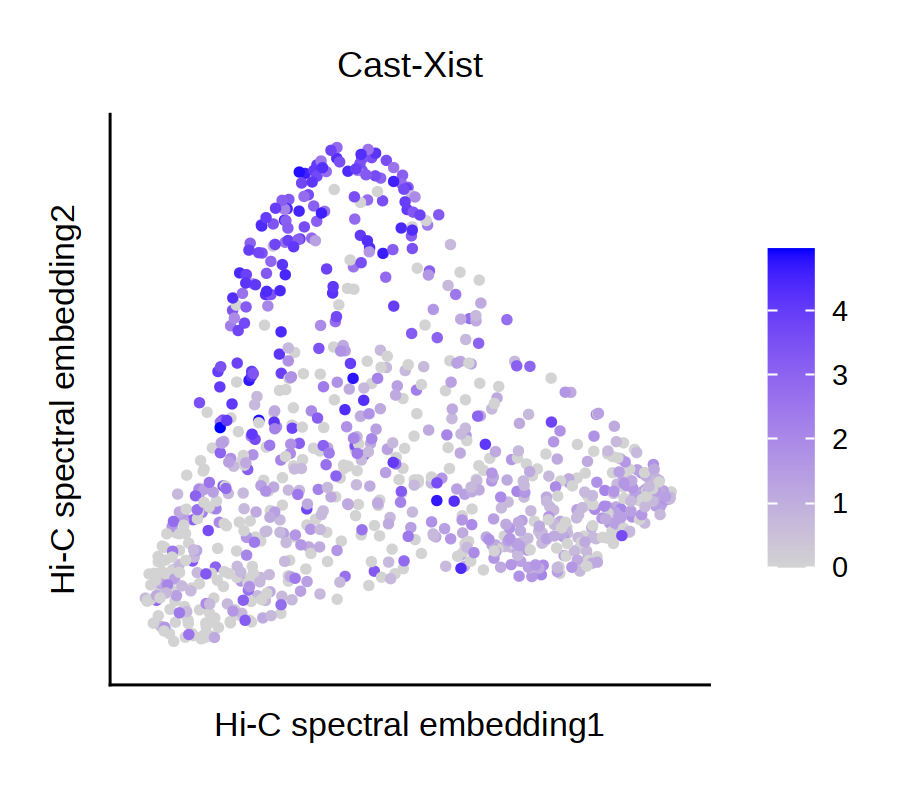

In [13]:
p <- FeaturePlot(esc.AS, features = "Cast-Xist", reduction = "fasthigashi", pt.size = 0.4) + 
    xlim(-0.01,0.012) + ylim(-0.01,0.016)+
    theme(axis.text.x = element_blank(), 
    axis.text.y = element_blank(),
    axis.ticks = element_blank(),
    axis.title.y = element_text(angle=90),
    axis.title.x = element_text(),
    text = element_text(family="Arial", size=8),
    axis.line = element_line(colour="black", linewidth = 0.25),
    legend.key = element_rect(colour = NA),
    legend.key.width = unit(0.4, "cm"),
    plot.title = element_text(color="black", size=8.5,face = "plain"),
    ) +
    xlab("Hi-C spectral embedding1") + ylab("Hi-C spectral embedding2")
p

ggsave("/share/Data/hxie/project/202209/esc_xwliu/esc0312_tidyup/fig1/figures/fig1E_4.svg", width = 3, height = 2.65, units = "in", dpi = 300)

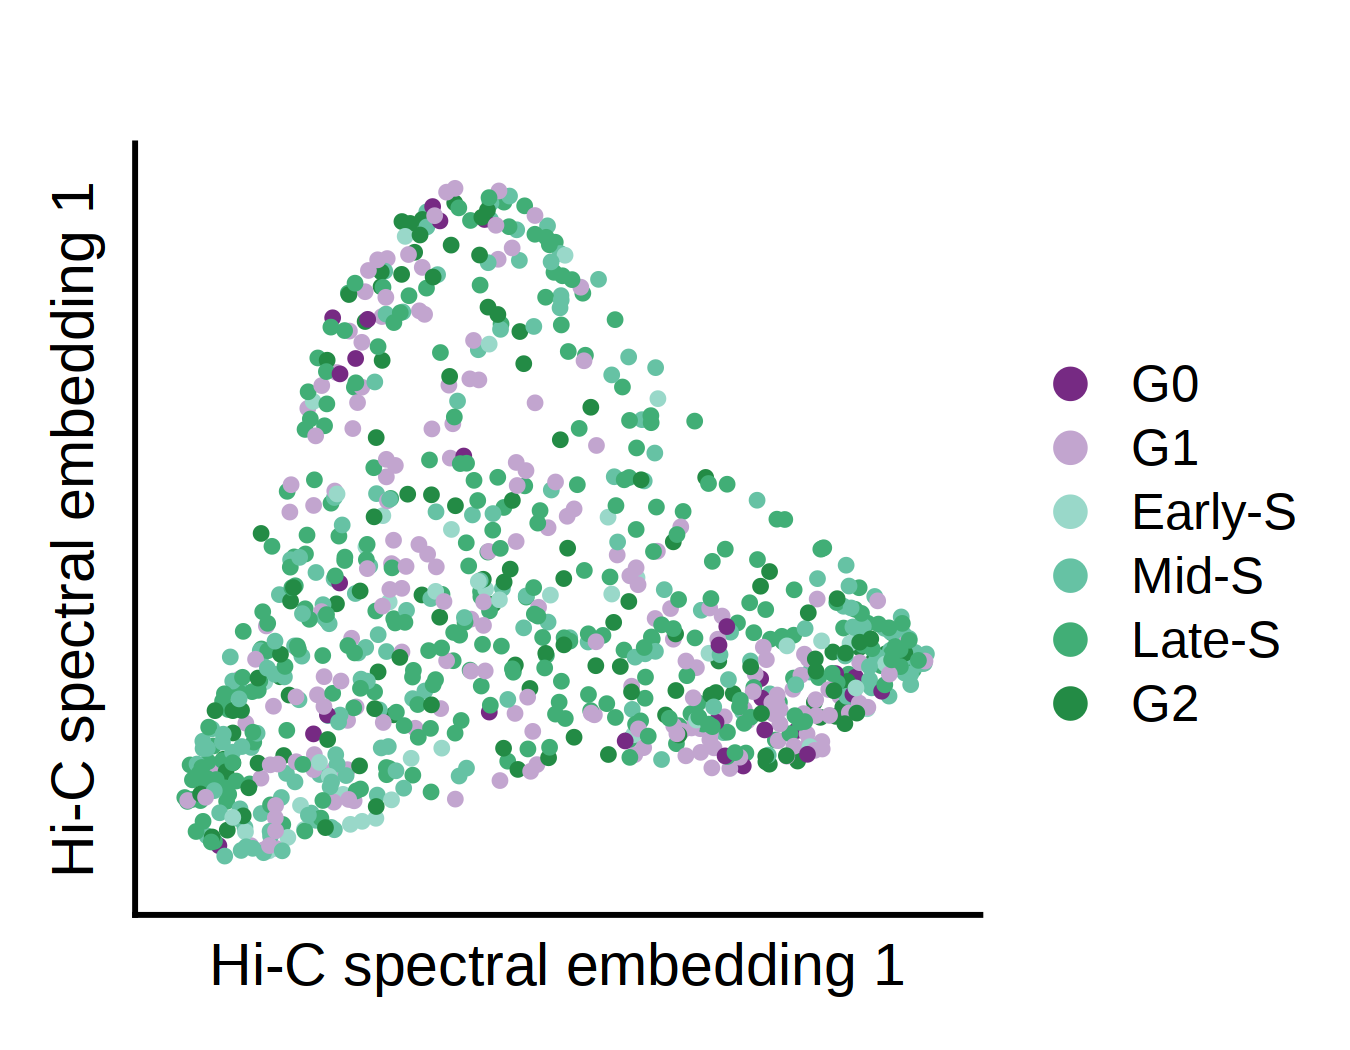

In [14]:
options(repr.plot.width = 4.5,repr.plot.height = 3.5,repr.plot.res = 300)
colors = c("G0"="#762a83","G1"="#c2a5cf","Early-S"="#99d8c9","Mid-S"="#66c2a4","Late-S"="#41ae76","G2"="#238b45","M"="#ea6e34","Unknown"="gray")
DimPlot(esc.AS, reduction = "fasthigashi", group.by = 'cellcycle_threshold', label = F, pt.size = 1, label.size = 3,repel = T,cols=alpha(colors,1)) + ggtitle("") +
    xlim(-0.01,0.012) + ylim(-0.01,0.016)+
    theme(axis.text.x = element_blank(), axis.text.y = element_blank(), axis.ticks = element_blank()) +
    xlab("Hi-C spectral embedding 1") + ylab("Hi-C spectral embedding 1")

In [15]:
set.seed(21)
esc.AS$kmeans_6 <- kmeans(x = esc.AS@reductions[["fasthigashi"]]@cell.embeddings,centers = 6)$cluster

In [25]:
esc.AS@meta.data <- esc.AS@meta.data %>% mutate(hic_cluster = ifelse(kmeans_6 == 5, "c0", 
                                          ifelse(kmeans_6 == 3, "c3", 
                                          ifelse(kmeans_6 == 6, "c5",
                                          ifelse(kmeans_6 == 2, "c2",
                                          ifelse(kmeans_6 == 1, "c1","c4"))))))

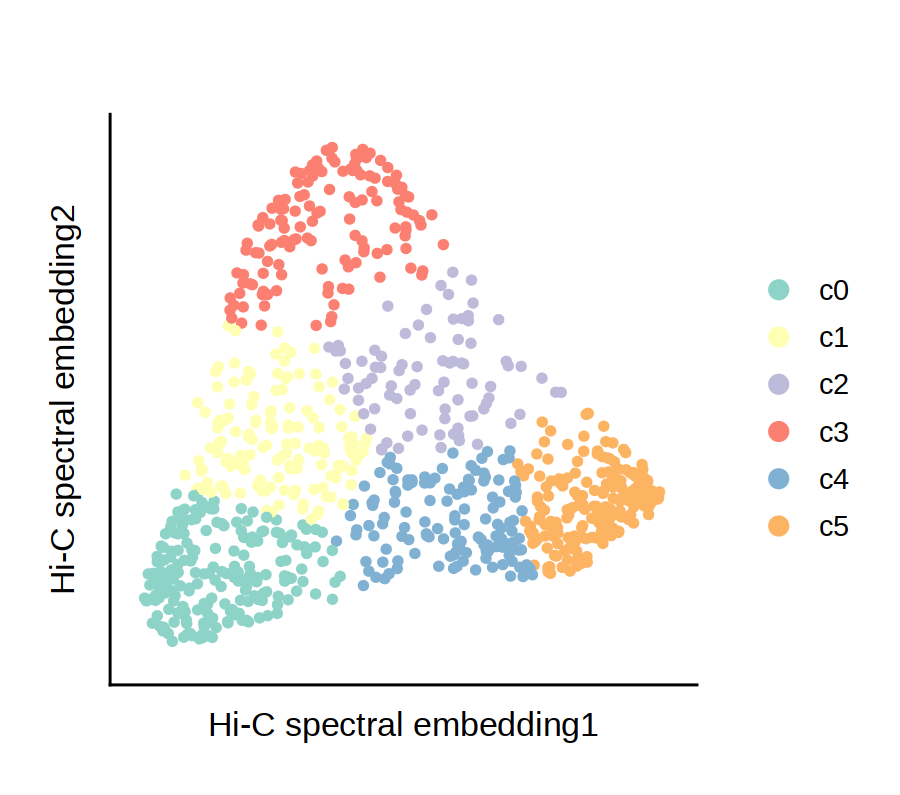

In [37]:
options(repr.plot.width = 3,repr.plot.height = 2.65, repr.plot.res = 300)
colors = c('#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462')
p <- DimPlot(esc.AS, reduction = "fasthigashi", group.by = 'hic_cluster', label = F, pt.size = 0.4, label.size = 5,repel = T,cols=alpha(colors,1)) + ggtitle("") +
    xlim(-0.01,0.012) + ylim(-0.01,0.016)+
    theme(axis.text.x = element_blank(), 
        axis.text.y = element_blank(),
        axis.ticks = element_blank(),
        axis.title.y = element_text(angle=90),
        axis.title.x = element_text(),
        text = element_text(family="Arial", size=8),
        axis.line = element_line(colour="black", linewidth = 0.25),
        legend.key = element_rect(colour = NA),
#        legend.position = "top",
#        legend.direction = "horizontal",
        legend.key.size= unit(0.4, "cm"),
        legend.key.width = unit(0.4, "cm"),
#        legend.margin = unit(0, "cm"),
        ) + guides(color = guide_legend(override.aes = list(size = 1.5))) +
    xlab("Hi-C spectral embedding1") + ylab("Hi-C spectral embedding2")
p 
ggsave("/share/Data/hxie/project/202209/esc_xwliu/esc0312_tidyup/supplement_fig/supp_fig1/figures/s1_xci_fasthigashi_umap_cluster_in_hic.svg", width = 3, height = 2.65, units = "in", dpi = 300)

`summarise()` has grouped output by 'hic_cluster'. You can override using the
`.groups` argument.


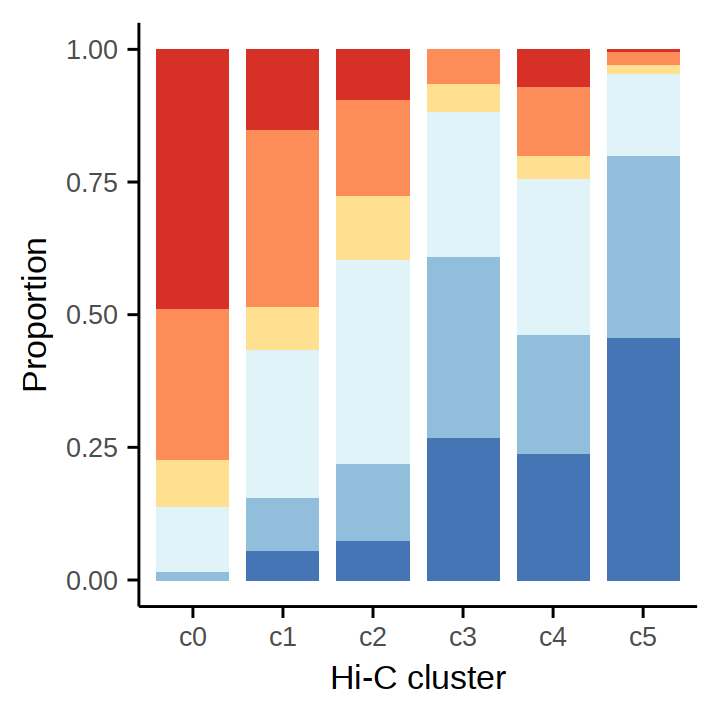

In [38]:
options(repr.plot.width = 2.4,repr.plot.height = 2.4, repr.plot.res = 300)
colors = c('#d73027','#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4')
p <- esc.AS@meta.data %>% group_by(hic_cluster,day) %>% summarise(total=n()) %>% mutate(percentage=total/sum(total)) %>% 
    ggplot(aes(x=hic_cluster, y=percentage, fill=day)) + geom_bar(stat="identity",width=0.8) + 
    scale_fill_manual( values = colors) + theme_classic() + xlab("Hi-C cluster") + ylab("Proportion") +
    theme(
    axis.title.y = element_text(angle=90),
    axis.title.x = element_text(),
    text = element_text(family="Arial", size=8),
    axis.line = element_line(colour="black", linewidth = 0.25),
    axis.ticks = element_line(colour = "black", size = 0.25),
    legend.key = element_rect(colour = NA),
    legend.position = "none",
#        legend.direction = "horizontal",
    legend.key.size= unit(0.4, "cm"),
    legend.key.width = unit(0.4, "cm"),
#        legend.margin = unit(0, "cm"),
    ) + guides(color = guide_legend(override.aes = list(size = 1.5)))
p
ggsave("/share/Data/hxie/project/202209/esc_xwliu/esc0312_tidyup/supplement_fig/supp_fig1/figures/s1_xci_hic_cluster_proportion_in_day.svg", width = 2.4, height = 2.4, units = "in", dpi = 300)

`summarise()` has grouped output by 'umap_plot_cluster'. You can override using
the `.groups` argument.


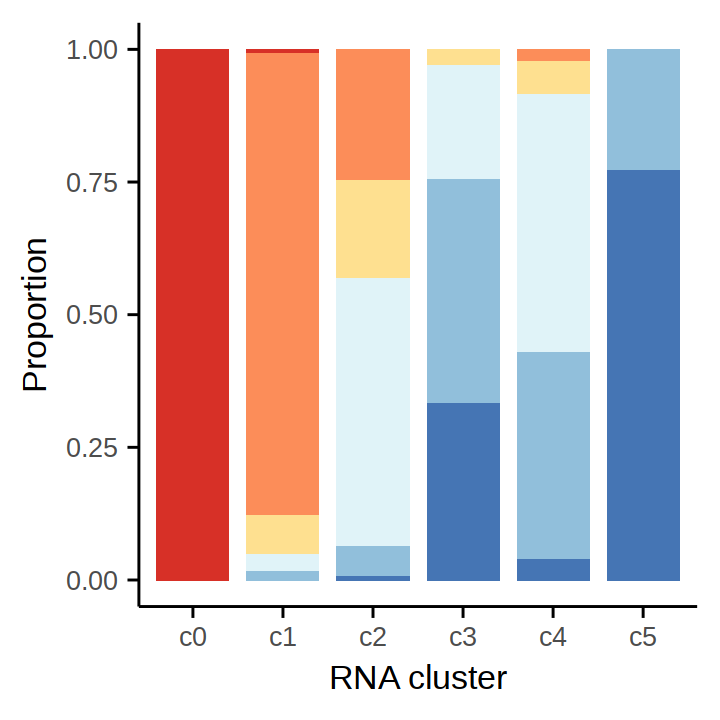

In [39]:
options(repr.plot.width = 2.4,repr.plot.height = 2.4, repr.plot.res = 300)
colors = c('#d73027','#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4')
p <- esc.AS@meta.data %>% group_by(umap_plot_cluster,day) %>% summarise(total=n()) %>% mutate(percentage=total/sum(total)) %>% 
    ggplot(aes(x=umap_plot_cluster, y=percentage, fill=day)) + geom_bar(stat="identity",width=0.8) + 
    scale_fill_manual( values = colors) + theme_classic() + xlab("RNA cluster") + ylab("Proportion") +
    theme(
    axis.title.y = element_text(angle=90),
    axis.title.x = element_text(),
    text = element_text(family="Arial", size=8),
    axis.line = element_line(colour="black", linewidth = 0.25),
    axis.ticks = element_line(colour = "black", size = 0.25),
    legend.key = element_rect(colour = NA),
    legend.position = "none",
#        legend.direction = "horizontal",
    legend.key.size= unit(0.4, "cm"),
    legend.key.width = unit(0.4, "cm"),
#        legend.margin = unit(0, "cm"),
    ) + guides(color = guide_legend(override.aes = list(size = 1.5)))
p
ggsave("/share/Data/hxie/project/202209/esc_xwliu/esc0312_tidyup/supplement_fig/supp_fig1/figures/s1_xci_rna_cluster_proportion_in_day.svg", width = 2.4, height = 2.4, units = "in", dpi = 300)